### SVM 결정 경계 그리기
- 데이터 : iris.csv
- 분류 (SVC)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
irisDF = pd.read_csv('../DATA/iris.csv')
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
featureDF = irisDF[irisDF.columns[2:4]]     # 'petal_length', 'petal_width'
targetSR = irisDF[irisDF.columns[-1]]
targetSR.replace({'setosa':0, 'versicolor':1, 'virginica':1}, inplace=True)     # setosa vs. (versicolor + virginica)

In [5]:
clf = SVC(kernel='linear', C=1) # 이 부분만 달라짐, 나머지는 고정
clf.fit(featureDF, targetSR)

SVC(C=1, kernel='linear')

In [6]:
w = clf.coef_[0]    # 가중치 값 구하기, clf.coef_ (1x4) 에서의 0번째 행 저장 (가중치 4개)
a = -w[0] / w[1]    # 기울기 값 구하기
xx = np.linspace(1, 6)      # x 정의역 설정
yy = a * xx - (clf.intercept_[0]) / w[1]    # 결정 경계 (직선)

In [7]:
# 수학적으로 결정 경계 (separating hyperplane) 주변의 서포트 벡터들은 거리가 np.sqrt(1 + a**2) 만큼 떨어져 있음 (??)
# ㄴ 무슨 말이지? 결정 경계 까지의 거리는 1 / ||w|| 아닌가?
margin = 1 / np.sqrt(np.sum(clf.coef_**2))

In [8]:
## 각 직선은 yy (결정 경계) 로부터 y축 상으로 1/w[1] 만큼 떨어져 있다.
yy_up = yy + np.sqrt(1 + a**2) * margin     # 위   직선
yy_down = yy - np.sqrt(1 + a**2) * margin   # 아래 직선

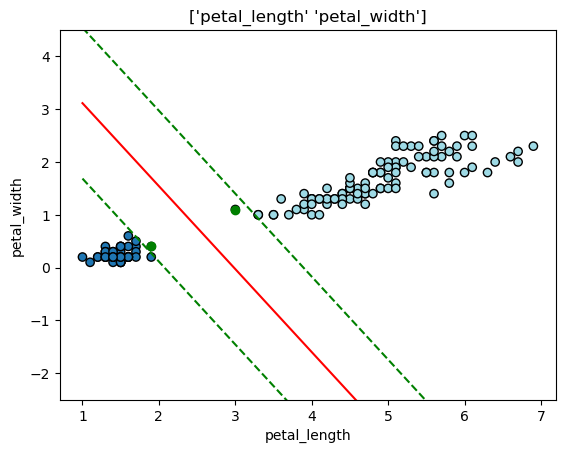

In [9]:
plt.plot(xx, yy, 'r-')          # 결정 경계 그리기
plt.plot(xx, yy_up, 'g--')      # 주변 서포트 벡터 1
plt.plot(xx, yy_down, 'g--')    # 주변 서포트 벡터 2

# 데이터 점들 찍기
plt.scatter(featureDF[featureDF.columns[0]].values
            , featureDF[featureDF.columns[1]].values
            , c=targetSR.values
            , cmap=plt.cm.tab20
            , edgecolors='k'
            )
# 서포트 벡터 머신 표기
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color='green')

plt.ylim(-2.5, 4.5)     # y축 표시 범위 설정

plt.title(f'{featureDF.columns.values}')
plt.xlabel(featureDF.columns[0])
plt.ylabel(featureDF.columns[1])
plt.show()